In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random 
import pandas as pd
from pyomo.environ import *


/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


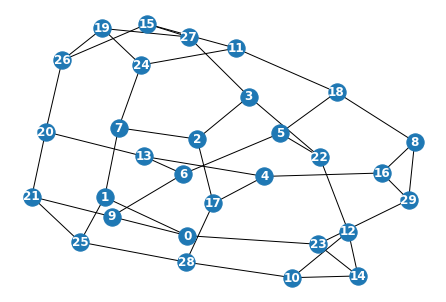

In [2]:

G=nx.random_regular_graph(3, 30, seed=None)
pos=nx.spring_layout(G)
l1=nx.draw(G, pos=pos)
nx.draw_networkx_labels(G, pos,font_size=12,font_color='white',font_weight='bold')
plt.show()

In [3]:
model = AbstractModel()
model.N=Param(mutable=True,initialize=len(G.nodes))
model.i = RangeSet(0,model.N-1)
model.j = Set(initialize=model.i)
model.L = Param(model.i,model.j, default=0,mutable=True)
model.X = Var(model.i, domain=Binary)
model.y = Var(within=NonNegativeReals, initialize=0)
def rule_C1(model,i):
        return model.X[i]+ sum(model.X[j] for j in model.j if value(model.L[i,j])==1)>=1
model.C1 = Constraint(model.i, rule=rule_C1)
def rule_C2(model):
    return model.y>=sum(model.X[i] for i in model.i)
model.C2 = Constraint(rule=rule_C2)
model.OF=Objective(expr=model.y, sense=minimize)

In [4]:
Lines={edg:1 for edg in G.edges}
data = {None: {
    'N': {None: len(G.nodes)},       
    'L': Lines,}}
instance = model.create_instance(data)

In [5]:
opt = SolverFactory('glpk')
results = opt.solve(instance) # solves and updates instance

In [6]:
print(value(instance.y))
for i in instance.i:
    if value(instance.X[i])>0:
        print(i,value(instance.X[i]))

11.0
0 1.0
2 1.0
3 1.0
8 1.0
10 1.0
13 1.0
14 1.0
21 1.0
22 1.0
24 1.0
26 1.0


In [7]:
print ("The solver returned a status of:"+str(results.solver.status))
from pyomo.opt import SolverStatus, TerminationCondition
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
     print ("this is feasible and optimal")
elif results.solver.termination_condition == TerminationCondition.infeasible:
     print ("do something about it? or exit?")
else:
     print (str(results.solver))

The solver returned a status of:ok
this is feasible and optimal


In [8]:
#instance.C1.pprint()

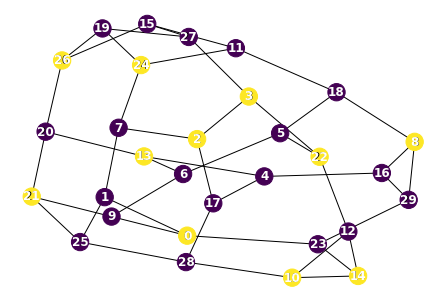

In [9]:
cvec=[]
for i in G.nodes:
    cvec.append(value(instance.X[i]))
l1=nx.draw(G, pos=pos,node_color=cvec,with_labels=True)
labels = nx.draw_networkx_labels(G, pos=pos, font_color='white' ,font_weight='bold' )
plt.show()